In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ds = pd.read_csv("/content/Salary_Data.csv")
X = ds["YearsExperience"].values
Y = ds["Salary"].values

In [3]:
X

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [4]:
Y

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872])

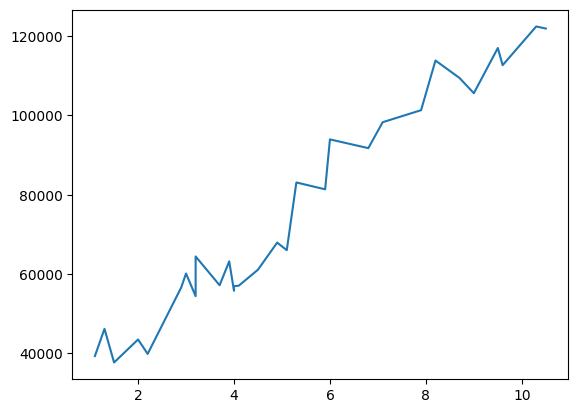

In [5]:
plt.plot(X,Y)

In [6]:
X = np.array(X)
Y = np.array(Y)
def mean(X):
    return np.sum(X)/len(X)
def variance(X):
    mean_value = mean(X)
    return np.sum((X-mean_value)**2)/len(X)
def norm(X):
    mean_value = mean(X)
    variance_value = variance(X)
    return (X - mean_value)/np.sqrt(variance_value)
X_norm = norm(X)
X_norm

array([-1.51005294, -1.43837321, -1.36669348, -1.18749416, -1.11581443,
       -0.86493538, -0.82909552, -0.75741579, -0.75741579, -0.57821647,
       -0.50653674, -0.47069688, -0.47069688, -0.43485702, -0.29149756,
       -0.1481381 , -0.07645838, -0.00477865,  0.21026054,  0.2461004 ,
        0.53281931,  0.6403389 ,  0.92705781,  1.03457741,  1.21377673,
        1.32129632,  1.50049564,  1.5363355 ,  1.78721455,  1.85889428])

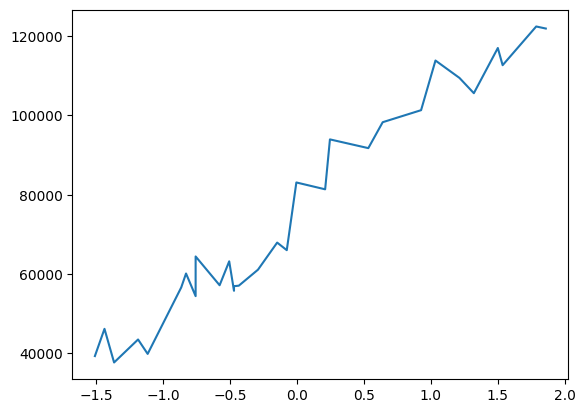

In [7]:
plt.plot(X_norm,Y)

In [8]:
import random
class SimpleLR:
    def __init__(self, lr=0.1, max_iter=2000, threshold=1e-6):
        self.lr = lr
        self.max_iter = max_iter
        self.threshold = threshold
        self.weight = random.uniform(-1,1)
        self.bias = random.uniform(-1,1)
    def predict(self, X):
        return self.weight*X + self.bias
    def fit(self, X, Y):
        n = len(X)
        loss_history = []
        y_pred = self.predict(X)
        errors = Y-y_pred
        prev_loss = (1/(2*n)) * np.sum(errors**2)
        loss_history.append(prev_loss)
        for i in range(self.max_iter):
            w_grad = (1/n) * np.sum(errors*X)
            b_grad = (1/n) * np.sum(errors)
            self.weight += self.lr * w_grad
            self.bias += self.lr * b_grad
            y_pred = self.predict(X)
            errors = Y-y_pred
            curr_loss = (1/(2*n)) * np.sum(errors**2)
            if np.abs(curr_loss - prev_loss) < self.threshold:
                break
            prev_loss = curr_loss
            loss_history.append(curr_loss)
        return loss_history
    def plot(self, X, Y):
        y_pred = self.predict(X)
        plt.plot(X,Y)
        plt.plot(X,y_pred)

In [9]:
model = SimpleLR()
loss_history = model.fit(X_norm, Y)
loss_history

[3251444272.619867,
 2636640601.2357087,
 2138649627.4145405,
 1735276938.6193945,
 1408545060.6953266,
 1143892239.576831,
 929523454.4708499,
 755884738.535005,
 615237378.6269706,
 501313017.1014631,
 409034284.2658017,
 334288510.6689161,
 273744434.05543876,
 224703731.998522,
 184980763.3324196,
 152805158.71287656,
 126742918.9710467,
 105632504.78016447,
 88533069.28554994,
 74682526.53491214,
 63463586.906895556,
 54376245.80820215,
 47015499.51826042,
 41053295.02340768,
 36223909.382576905,
 32312107.01350401,
 29143547.094554923,
 26577013.56020618,
 24498121.39738371,
 22814218.745497525,
 21450257.597469684,
 20345449.067567118,
 19450554.158346076,
 18725689.281877022,
 18138548.731937077,
 17662964.886485722,
 17277741.97167012,
 16965711.410669494,
 16712966.656258976,
 16508243.405186452,
 16342417.57181772,
 16208098.646789039,
 16099300.317515813,
 16011173.6708045,
 15939791.08696834,
 15881971.194061037,
 15835137.080806142,
 15797201.449069662,
 15766473.58736312

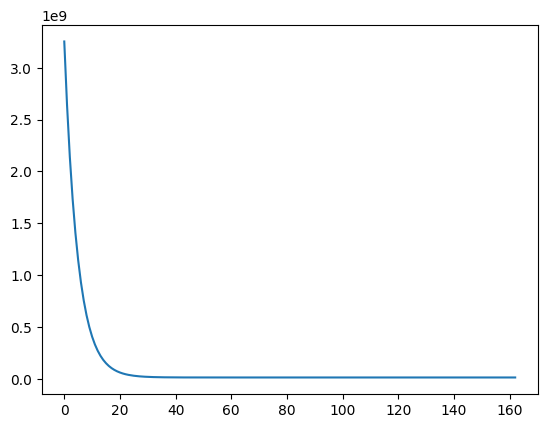

In [10]:
plt.plot(loss_history)

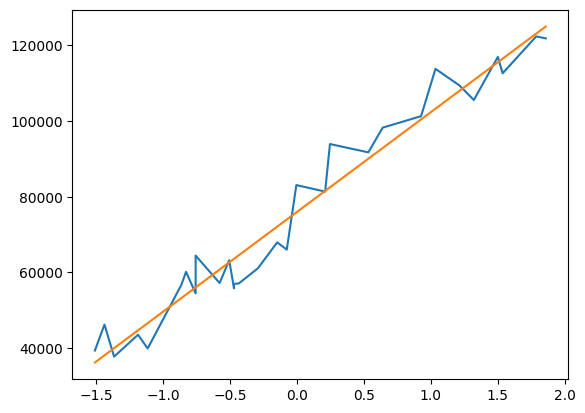

In [11]:
model.plot(X_norm,Y)